# Análise e Preparação de Dados da Argentina

O processo de análise e preparação de dados é fundamental para garantir a qualidade e a confiabilidade das análises subsequentes. No script Python fornecido, realizamos uma série de etapas essenciais para preparar um conjunto de dados da Argentina para análise. Abaixo estão as etapas realizadas:

## Carregamento dos Dados

O primeiro passo foi carregar os dados para um DataFrame do Pandas a partir de um arquivo CSV. Isto estabelece a base para as operações de processamento de dados.

## Limpeza e Tratamento de Dados

Os valores infinitos, que podem causar erros em cálculos e modelagens, foram substituídos por valores `NaN` (Not a Number). Em seguida, procedeu-se à remoção de linhas que continham valores `NaN` em colunas críticas como 'ValorFOBUS' e 'PesoLiquido', além de excluir registros onde esses campos eram inferiores a 1, provavelmente erros ou entradas inválidas.

## Detecção e Remoção de Outliers

Utilizou-se o método do Intervalo Interquartílico (IQR) para calcular os limites e identificar os outliers. Isso nos ajudou a filtrar os dados, mantendo apenas os registros que se enquadram dentro dos limites estabelecidos, eliminando valores extremos que poderiam distorcer análises posteriores.

## Padronização dos Dados

Para garantir que as variáveis 'PesoLiquido' e 'ValorFOBUS' contribuíssem de forma equitativa para a análise, aplicou-se a padronização Z-score, que redimensiona os dados para ter uma média de 0 e um desvio padrão de 1.

## Visualização de Dados Padronizados

Foram gerados histogramas para as variáveis padronizadas, proporcionando uma visualização da distribuição dos dados após a padronização.

## Normalização de Dados

Aplicou-se a normalização Min-Max à coluna 'CodigoSH4', uma etapa importante quando se trabalha com modelos de aprendizado de máquina que são sensíveis à escala das variáveis.

## Análise de Frequência

Para entender melhor a distribuição da variável 'CodigoSH4', gerou-se um gráfico de barras da sua frequência, que oferece uma visão clara de como os códigos estão distribuídos no conjunto de dados.

## Salvamento dos Dados

Após todas as etapas de limpeza e transformação, o DataFrame limpo e processado foi salvo em um arquivo CSV, garantindo que o trabalho de preparação não precise ser repetido no futuro.

## Cálculo de Estatísticas Descritivas

Por fim, calculou-se a moda para as colunas 'ValorFOBUS' e 'PesoLiquido', proporcionando insights sobre os valores mais frequentes nessas variáveis.

Este processo de preparação de dados é essencial para assegurar que as análises seguintes sejam feitas em dados limpos e de alta qualidade.


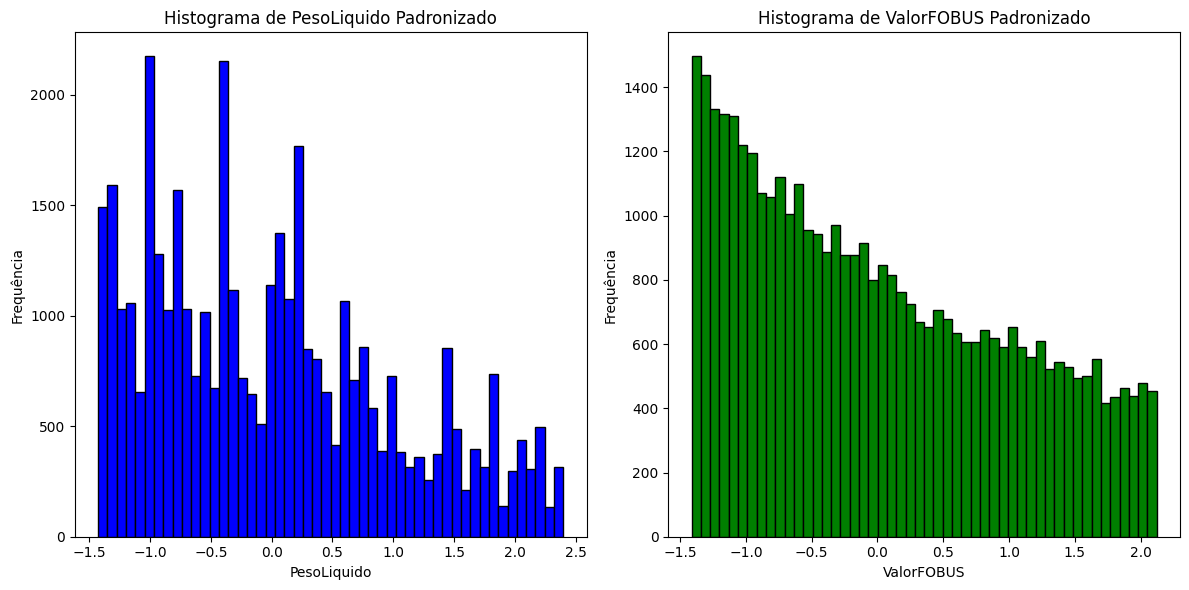

       Ano  Mes       Pais           Cidade  CodigoSH4  \
50  2010.0  1.0  Argentina      Ampére - PR   0.939869   
51  2010.0  1.0  Argentina      Ampére - PR   0.939869   
70  2010.0  1.0  Argentina  Araraquara - SP   0.030217   
91  2010.0  1.0  Argentina   Araucária - PR   0.386054   
92  2010.0  1.0  Argentina   Araucária - PR   0.386054   

                                         DescricaoSH4  CodigoSH2  \
50                  Other furniture and parts thereof       94.0   
51                  Other furniture and parts thereof       94.0   
70  Milk and cream, concentrated or containing add...        4.0   
91  Articles for the conveyance or packing of good...       39.0   
92  Articles for the conveyance or packing of good...       39.0   

                                         DescricaoSH2  \
50  Furniture; bedding, mattresses, cushions and s...   
51  Furniture; bedding, mattresses, cushions and s...   
70  Dairy produce; birds' eggs; natural honey; others   
91            

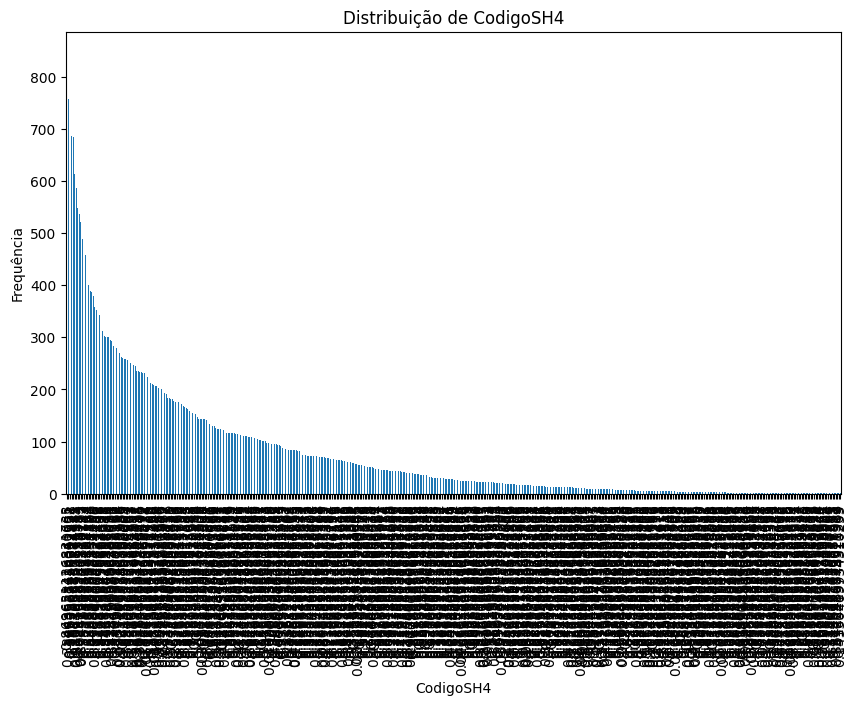

Moda de ValorFOBUS: 0   -1.038405
Name: ValorFOBUS, dtype: float64
Moda de PesoLiquido: 0   -1.038885
Name: PesoLiquido, dtype: float64


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar o DataFrame
df = pd.read_csv('new_df_argentina_ml.csv')

# Substituir infinitos por NaN para que possam ser tratados posteriormente
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remover linhas com NaN em 'ValorFOBUS' e 'PesoLiquido'
df.dropna(subset=['ValorFOBUS', 'PesoLiquido'], inplace=True)

# Remover linhas onde 'ValorFOBUS' é menor que 1
df = df[df['ValorFOBUS'] >= 1]

# Remover linhas onde 'PesoLiquido' é menor que 1
df = df[df['PesoLiquido'] >= 1]

# Calcular o IQR para 'ValorFOBUS'
Q1_valor = df['ValorFOBUS'].quantile(0.25)
Q3_valor = df['ValorFOBUS'].quantile(0.75)
IQR_valor = Q3_valor - Q1_valor

# Definir limites para considerar outliers em 'ValorFOBUS'
limite_inferior_valor = Q1_valor - 1.5 * IQR_valor
limite_superior_valor = Q3_valor + 1.5 * IQR_valor

# Calcular o IQR para 'PesoLiquido'
Q1_peso = df['PesoLiquido'].quantile(0.25)
Q3_peso = df['PesoLiquido'].quantile(0.75)
IQR_peso = Q3_peso - Q1_peso

# Definir limites para considerar outliers em 'PesoLiquido'
limite_inferior_peso = Q1_peso - 1.5 * IQR_peso
limite_superior_peso = Q3_peso + 1.5 * IQR_peso

# Filtrar o DataFrame para remover outliers
df = df[(df['ValorFOBUS'] >= limite_inferior_valor) & (df['ValorFOBUS'] <= limite_superior_valor)]
df = df[(df['PesoLiquido'] >= limite_inferior_peso) & (df['PesoLiquido'] <= limite_superior_peso)]

# Padronizar 'PesoLiquido' e 'ValorFOBUS' utilizando Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['PesoLiquido', 'ValorFOBUS']] = scaler.fit_transform(df[['PesoLiquido', 'ValorFOBUS']])

# Criar histogramas dos dados padronizados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['PesoLiquido'], bins=50, color='blue', edgecolor='black')
plt.title('Histograma de PesoLiquido Padronizado')
plt.xlabel('PesoLiquido')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(df['ValorFOBUS'], bins=50, color='green', edgecolor='black')
plt.title('Histograma de ValorFOBUS Padronizado')
plt.xlabel('ValorFOBUS')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Normalizar 'CodigoSH4' utilizando MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['CodigoSH4'] = scaler.fit_transform(df[['CodigoSH4']].values.reshape(-1, 1))

# Verificar as primeiras linhas do DataFrame após a normalização
print(df.head())

# Contar a frequência de 'CodigoSH4' e gerar um gráfico de barras
codigo_counts = df['CodigoSH4'].value_counts()
plt.figure(figsize=(10, 6))
codigo_counts.plot(kind='bar')
plt.title('Distribuição de CodigoSH4')
plt.xlabel('CodigoSH4')
plt.ylabel('Frequência')
plt.show()

# Salvar o DataFrame tratado em um arquivo CSV
df.to_csv('new_df_argentina_ml.csv', index=False)

# Mostrar as primeiras linhas do DataFrame
df.head()

# Calcular a moda para 'ValorFOBUS' e 'PesoLiquido'
moda_valor_fobus = df['ValorFOBUS'].mode()
moda_peso_liquido = df['PesoLiquido'].mode()

# Exibir as modas calculadas
print("Moda de ValorFOBUS:", moda_valor_fobus)
print("Moda de PesoLiquido:", moda_p)
